# Replicating Bjorn's thesis: notebook 1

## The following notebook is made in March 2022 to trace out data issues.

On trying to replicate the work there were several issues encountered. The original computational work was done on a Mac and had an environment.yaml file with over 250 dependancies. It was not possible to create such an environment on Windows. A new updated environment was made which could be created with Conda, however, the notebooks did not run for various reasons.

In an attempt to understand the discrepancies in the published computational work available on Github, and the notebooks, we are retracing the steps taken by Bjorn. Bjorn states he begins with the DDP data. We suspect the data on Surf is a mix of original and cleaned data. We will start from the original data as published by DDP, and clean it with his algorithms for cleaning.

In [1]:
import sys
import os
import glob

sys.path.insert(0,os.path.dirname(os.getcwd()))

In [2]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne

sns.set_theme(style="whitegrid")
%matplotlib inline

C:\Users\makeda\anaconda3\envs\mne-march2\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\mne-march2\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\mne-march2\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


In [3]:
import fnmatch
import warnings
import re
warnings.filterwarnings('ignore')

import helper_functions

In [4]:
from config import PATH_RAW_DATA, PATH_METADATA, PATH_DATA_PROCESSED_ML

In [5]:
make_dir_names = ['11mnd mmn',
                 '17mnd mmn',
                 '23mnd mmn',
                 '29mnd mmn',
                 '35mnd mmn',
                 '41mnd mmn',
                 '47mnd mmn',]
make_dir_names

['11mnd mmn',
 '17mnd mmn',
 '23mnd mmn',
 '29mnd mmn',
 '35mnd mmn',
 '41mnd mmn',
 '47mnd mmn']

The original files as published here (https://easy.dans.knaw.nl/ui/datasets/id/easy-dataset:112935) have been loaded onto the hard drive of Dr. Moore

In [6]:

mother_files = glob.glob('C:/Projects/mother-eeg-data/*/Data/*.cnt')
listed_names_ddp_mother = []
for file in mother_files:
    file_name = os.path.basename(file)
    listed_names_ddp_mother.append(file_name)
print(listed_names_ddp_mother)

['015_thomas_mmn36w.cnt', '034_17_mc_mmn36_wk.cnt', '036_17_mc_mmn36_wk.cnt', '036_29_mc_mmn36_wk.cnt', '119_17_jr_mmn.cnt', '119_29_jr_mmn36_wk.cnt', '133_17_jr_mmn.cnt', '133_29_jr_mmn36_wk.cnt', '142_17_jd_mmn36_wk.cnt', '156_17_jd_mmn36_wk.cnt', '158_17_mr_mmn36.cnt', '158_29_mr_mmn36_wk.cnt', '162_17_mr_mmn36_wk.cnt', '162_17_mr_mmn36_wk.cnt', '164_17_jr_mmn36_wk.cnt', '164_29_jr_mmn36_wk.cnt', '172_17_mr_mmn36.cnt', '172_29_mr_mmn36_wk.cnt', '175_17_jd_mmn_wk.cnt', '162_17_mr_mmn36_wk.cnt', '164_17_jr_mmn36_wk.cnt', '164_29_jr_mmn36_wk.cnt', '172_17_mr_mmn36.cnt', '172_29_mr_mmn36_wk.cnt', '175_17_jd_mmn_wk.cnt', '179_29_mr_mmn36_wk.cnt', '162_17_mr_mmn36_wk.cnt', '164_17_jr_mmn36_wk.cnt', '164_29_jr_mmn36_wk.cnt', '172_17_mr_mmn36.cnt', '172_29_mr_mmn36_wk.cnt', '175_17_jd_mmn_wk.cnt', '179_29_mr_mmn36_wk.cnt', '162_17_mr_mmn36_wk.cnt', '164_17_jr_mmn36_wk.cnt', '164_29_jr_mmn36_wk.cnt', '172_17_mr_mmn36.cnt', '172_29_mr_mmn36_wk.cnt', '175_17_jd_mmn_wk.cnt', '179_29_mr_mmn36_wk

In [7]:
surf_files = glob.glob('C:/Projects/EEG_explorer/Data/*/*.cnt')
listed_names_surf = []
for file in surf_files:
    file_name = os.path.basename(file)
    listed_names_surf.append(file_name)
print(listed_names_surf)

['001_11_jc_mmn36_wk_mmn25_wk_mmn47_wk_mmn58_wk.cnt', '003_11_jc_mmn36_slp_mmn25_wk_mmn47_slp_mmn58_slp.cnt', '004_11_mc_mmn.cnt', '005_11_jc_mmn2.cnt', '007_11_jc_mmn2_36_wk.cnt', '007_11_jc_mmn36_wk_mmn25_wk.cnt', '008_11_jc_mmn.cnt', '008_11_jc_mmn_3.cnt', '008_11_jc_mmn_36_slp_mmn25_slp_mmn47_wk_2.cnt', '009_11_jc_mmn36_wk_mmn25_wk.cnt', '009_11_jc_mmn47_wk.cnt', '010_11_jc_mmn2.cnt', '010_11_jc_mmn36_wk_mmn25_wk.cnt', '011_11_jc_mmn36_wk_mmn47_wk.cnt', '014_11_mc_mmn36_wk_mmn25_wk.cnt', '015_11_jc_mmn36_slp_mmn25_slp_mmn47_slp_mmn58_slp.cnt', '016_11_jc_mmn36_wk.cnt', '017_11_jc_mmn36_mixed_mmn25_slp.cnt', '018_11_mc_mmn.cnt', '018_11_mc_mmn2.cnt', '019_11_mc_mmn36_mixed_mmn25_slp_mmn47mixed_mmn58_slp.cnt', '021_11_jc_mmn36_slp_mmn25_slp_mmn47_slp_mmn58_slp.cnt', '023_11_mc_mmn36_wk.cnt', '024_11_jc_mmn36_slp_mmn25_slp_mmn47_slp_mmn58_slp.cnt', '025_11_mc_mmn36_wk.cnt', '027_11_jc_mmn25_wk.cnt', '027_11_jc_mmn36.cnt', '027_11_jc_mmn47_wk.cnt', '028_11_mc_mmn25_slp.cnt', '028_11_mc

In [8]:
print('We have:',len(listed_names_surf),'surf files')
print('We have:',len(listed_names_ddp_mother),'mother ddp files')

We have: 2322 surf files
We have: 308 mother ddp files


So the difference in numbers supports our idea that some of the data on Surf are in fact cleaned versions of the original, but Are there common files at all?


First we can check if every file contained in the ddp "mother" set is in the surf sef

In [9]:
check_all = all(item in listed_names_surf for item in listed_names_ddp_mother)
check_all

False

So, no , not all files in the mother data set made it to what we have. Did any?

In [10]:
check_any = any(item in listed_names_surf for item in listed_names_ddp_mother)
check_any
# so here we see there is some overlap

True

In [11]:
set_mother = set(listed_names_ddp_mother)
set_surf = set(listed_names_surf)
#len(set_mother.intersection(set_surf))
common_files_at_zero = set_mother.intersection(set_surf)
len(common_files_at_zero)

52

So we have 52 files that are shared (out of 308 mother files and over 2000 surf files). Maybe we have more, but the names are simply changed to avoid ? Let's look inside one example of a same-named file to see if they are in fact the same files. 

In [12]:
dir_names = {11: '11mnd mmn',
             17: '17mnd mmn',
             23: '23mnd mmn',
             29: '29mnd mmn',
             35: '35mnd mmn',
             41: '41mnd mmn',
             47: '47mnd mmn'}
    
df_list = []
for age_group, directory in dir_names.items(): # Go into every age group folder        
    dir_path = os.path.join(PATH_RAW_DATA, directory)
    file_names = os.listdir(dir_path)
    cnt_paths = [os.path.join(dir_path, file_name) for file_name in fnmatch.filter(file_names, "*.cnt")]
    cnt_files = [os.path.basename(x)[:-4] for x in cnt_paths]
    codes = [int(re.search(r'\d+', x).group()) for x in cnt_files]
    df = pd.DataFrame(list(zip(codes, cnt_paths, cnt_files)), columns=['code', 'cnt_path','cnt_file']) 
    
    df['age_group'] = age_group
    df_list.append(df)

cnt_files_from_surf = pd.concat(df_list)

In [13]:

age_files = {11: 'ages_11mnths.txt',
             17: 'ages_17mnths.txt',
             23: 'ages_23mnths.txt',
             29: 'ages_29mnths.txt',
             35: 'ages_35mnths.txt',
             41: 'ages_41mnths.txt',
             47: 'ages_47mnths.txt'}

df_list = []

for age_group, age_file in age_files.items():
    df = pd.read_csv(os.path.join(PATH_METADATA, 'ages', age_file), sep="\t")
    df['age_group'] = age_group
    df_list.append(df)

age_df_surf = pd.concat(df_list)

In [14]:
merged_df = pd.merge(age_df_surf, cnt_files_from_surf, how='left', on=['age_group','code'])

In [15]:
len(merged_df), len(cnt_files_from_surf['cnt_path']), len(age_df_surf)

(2602, 2149, 1717)

In [16]:
data_11 = merged_df.loc[merged_df['age_group'] == 11]
data_17 = merged_df.loc[merged_df['age_group'] == 17]
data_23 = merged_df.loc[merged_df['age_group'] == 23]
data_29 = merged_df.loc[merged_df['age_group'] == 29]
data_35 = merged_df.loc[merged_df['age_group'] == 35]
data_41 = merged_df.loc[merged_df['age_group'] == 41]
data_47 = merged_df.loc[merged_df['age_group'] == 47]
data = [data_11, data_17, data_23, data_29, data_35, data_41, data_47]

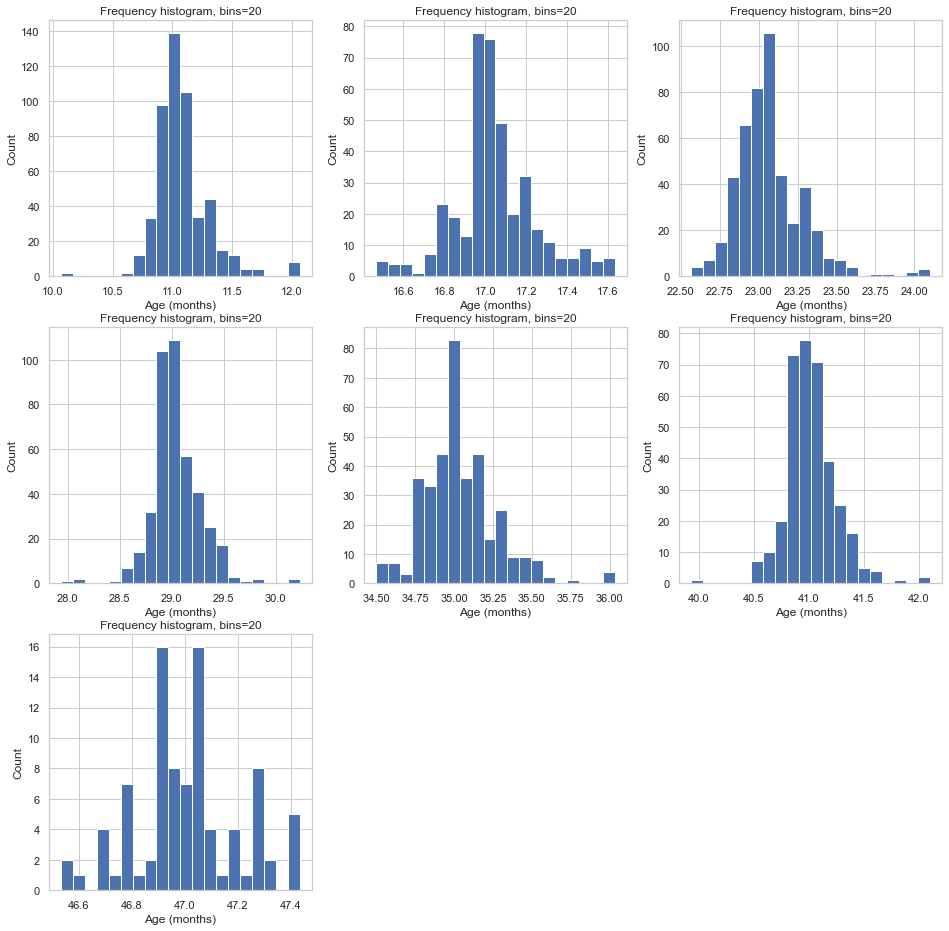

In [17]:
%matplotlib inline

bins = 20

fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    if i+1 > len(data):
        ax.remove()
    else:
        ax.hist(data[i]['age_months'], bins=bins)
        ax.set_xlabel('Age (months)')
        ax.set_ylabel('Count')
        ax.set_title(f'Frequency histogram, bins={bins}')

NOT Great! We do not perfectly reproduce Bjorn's histograms.Let's see the swarm plots to see if they are close.

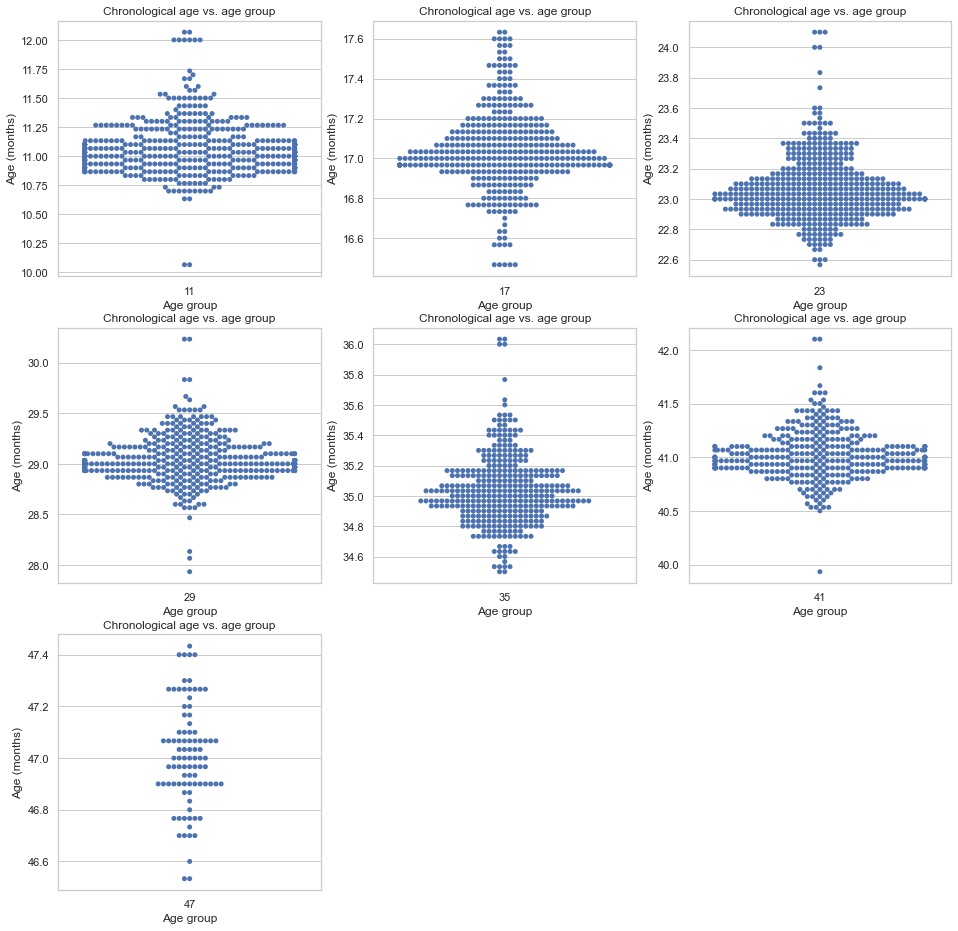

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    if i+1 > len(data):
        ax.remove()
    else:
        sns.swarmplot(ax=ax, x="age_group", y="age_months", data=data[i])
        ax.set_xlabel('Age group')
        ax.set_ylabel('Age (months)')
        ax.set_title('Chronological age vs. age group')

The swarmplots are not close (we compare to here: https://github.com/epodium/EEG_age_prediction/blob/main/Notebooks/Deep%20learning%20EEG_dataset%20preprocessing_ML.ipynb). We are dealing with a different dataset. We need to understand a bit more how it was altered. 

In [19]:
excluded_mothers = []
for file in set_mother:
    megaset = set_mother.intersection(set_surf)
    if file not in megaset:
        excluded_mothers.append(file)
print(excluded_mothers)

['746-438-17m-jr-mmn36.cnt', '619-247-17m-mc-mmn36.cnt', '489_17_md_mmn36_wk.cnt', '747-410-17m-mr-mmn36.cnt', '156_17_jd_mmn36_wk.cnt', '488_17_jd_mmn36_wk.cnt', '753-470-17m-mr-mmn36.cnt', '015_thomas_mmn36w.cnt', '707-060-17m-jd-mmn.cnt', '745-466-17m-mr-mmn36.cnt', '620_313_17m_jc_mmn36_waak.cnt', '036_17_mc_mmn36_wk.cnt', '754-472-17m-jr-mmn36.cnt', '627-356-17m-mc-mmn36-waak.cnt', '494_17_jd_mmn36_wk.cnt', '491_17_jd_mmn36_wk.cnt', '636-468-17m-jc-mmn36.cnt', '607-000-17m-jc-mmn1_36.cnt', '734_230_17m_mr_mmn36.cnt', '739-368-17m-mr-mmn36.cnt', '602-115-29m-mc-mmn36.cnt', '646-478-17m-mc-mmn36.cnt', '724-116-17m-jr-mmn36.cnt', '608-170-17m-mc-mmn36_2.cnt', '497_17_jd_mmn36_wk.cnt', '720-166-17m-jr-mmn.cnt', '735-125-17m-mr-mmn36.cnt', '625-253-17m-jc-mmn36.cnt', '034_17_mc_mmn36_wk.cnt', '725_161_17m_jr_mmn36_2.cnt', '628-369-17m-mc-mmn36.cnt', '755-471-17m-mr-mmn36.cnt', '707-060-17m-jr-mmn.cnt', '611_157_17m_mc_mmn36.cnt', '731-197-17m-jr-mmn.cnt', '749-461-17m-jr-mmn36.cnt', '7

In [20]:
len(excluded_mothers)

74

In [21]:
excluded_mother_names = excluded_mothers

In [22]:
import re 
new_names = []
for name in excluded_mother_names:
    new_name = re.sub("-","_",name)
    new_names.append(new_name)
new_names

    

['746_438_17m_jr_mmn36.cnt',
 '619_247_17m_mc_mmn36.cnt',
 '489_17_md_mmn36_wk.cnt',
 '747_410_17m_mr_mmn36.cnt',
 '156_17_jd_mmn36_wk.cnt',
 '488_17_jd_mmn36_wk.cnt',
 '753_470_17m_mr_mmn36.cnt',
 '015_thomas_mmn36w.cnt',
 '707_060_17m_jd_mmn.cnt',
 '745_466_17m_mr_mmn36.cnt',
 '620_313_17m_jc_mmn36_waak.cnt',
 '036_17_mc_mmn36_wk.cnt',
 '754_472_17m_jr_mmn36.cnt',
 '627_356_17m_mc_mmn36_waak.cnt',
 '494_17_jd_mmn36_wk.cnt',
 '491_17_jd_mmn36_wk.cnt',
 '636_468_17m_jc_mmn36.cnt',
 '607_000_17m_jc_mmn1_36.cnt',
 '734_230_17m_mr_mmn36.cnt',
 '739_368_17m_mr_mmn36.cnt',
 '602_115_29m_mc_mmn36.cnt',
 '646_478_17m_mc_mmn36.cnt',
 '724_116_17m_jr_mmn36.cnt',
 '608_170_17m_mc_mmn36_2.cnt',
 '497_17_jd_mmn36_wk.cnt',
 '720_166_17m_jr_mmn.cnt',
 '735_125_17m_mr_mmn36.cnt',
 '625_253_17m_jc_mmn36.cnt',
 '034_17_mc_mmn36_wk.cnt',
 '725_161_17m_jr_mmn36_2.cnt',
 '628_369_17m_mc_mmn36.cnt',
 '755_471_17m_mr_mmn36.cnt',
 '707_060_17m_jr_mmn.cnt',
 '611_157_17m_mc_mmn36.cnt',
 '731_197_17m_jr_mmn.cn

In [23]:
len(new_names)

74

In [24]:
set_renamed = set(new_names)
set_surf = set(listed_names_surf)
common_files_at_rename = set_renamed.intersection(set_surf)
len(common_files_at_rename)

0

What if we remove the m after 17? Well there is a more systematic way to look at this, and that is to compare files themselves. 

But this is largely irrelavant as Bjorn's work was clearly done on a larger file set. 

We have a file set that seems close in number to the original one. Therefore, we will use the Surf file set, although other investigations hint that the files have been altered. See upcoming notebooks. 

Let's use a hash function to see what is the comparison of the files themselves. 

In [30]:
import hashlib

#C:/Projects/mother-eeg-data/*/Data/*.cnt

file = 'C:/Projects/mother-eeg-data/1646832910497-Early_Precursors_of_Famil/Data/036_17_mc_mmn36_wk.cnt'

data_raw = mne.io.read_raw_cnt(file, eog='auto', preload=True)

data_str = str(data_raw)
data_bytes = bytes(data_str, 'utf-8')

result = hashlib.sha256(data_bytes)

print(result.hexdigest())

Reading 0 ... 743799  =      0.000 ...  1487.598 secs...
cf3c23dac3e32c7c5836bc5a2b609ebf396ba6bf722c7fc08eb107cfad088d7a


In [93]:
def hash_it_up_right(origin_folder1):
    hash_list = []
    file_names = []
    non_suspects1 = glob.glob(os.path.join(origin_folder1, '*.cnt'))
    BUF_SIZE = 65536 
    sha256 = hashlib.sha256()
    for file in non_suspects1:
        with open(file, 'rb') as f:
            while True:
                data = f.read(BUF_SIZE)
                if not data:
                    break
                sha256.update(data)
        result = sha256.hexdigest()

        hash_list.append(result)
        file_names.append(file)
        
    df = pd.DataFrame(hash_list, file_names)
    df.columns = ["hash"]
    df = df.reset_index() 
    df = df.rename(columns = {'index':'file_name'})
    
    return df

In [94]:
mother_df = hash_it_up_right('C:/Projects/mother-eeg-data/*/Data/')

In [88]:
surf_df = hash_it_up_right('C:/Projects/EEG_explorer/Data/*/')

In [89]:
mother_df_bn = mother_df
mother_df_bn['base_name'] = surf_df_bn.file_name.apply(os.path.basename).str.lower()
mother_df_bn

,file_name,hash,base_name
0,C:/Projects/mother-eeg-data\1646832910497-Earl...,0d854854def2f7aac80df64027885d28c698ac753f664f...,001_11_jc_mmn36_wk_mmn25_wk_mmn47_wk_mmn58_wk.cnt
1,C:/Projects/mother-eeg-data\1646832910497-Earl...,b9e53cd9807eeece442018ecbd45854e0da19f13922988...,003_11_jc_mmn36_slp_mmn25_wk_mmn47_slp_mmn58_s...
2,C:/Projects/mother-eeg-data\1646832910497-Earl...,263789094e3078e970daafa44edfa8ded6e351a2c75f7a...,004_11_mc_mmn.cnt
3,C:/Projects/mother-eeg-data\1646833329075-Earl...,e69f34a77510079aaa4763d93c3d50ab08b4430d839a9c...,005_11_jc_mmn2.cnt
4,C:/Projects/mother-eeg-data\1646833329075-Earl...,05973fa3a972a3b22a4aabca66ef3bdb69a3952cf26b3b...,007_11_jc_mmn2_36_wk.cnt
...,...,...,...
303,C:/Projects/mother-eeg-data\1646857503973-Earl...,04b9f2317aa321750751471650247909db4d0af625990b...,473_11_md_mmn58_wk.cnt
304,C:/Projects/mother-eeg-data\1646857661935-Earl...,cade53c907f6897f23caa787385a40cd3a17cca276d337...,474_11_md_mmn25_2_wk.cnt
305,C:/Projects/mother-eeg-data\1646857661935-Earl...,df70c07e3e067c2dbefc6f120f41333f2d38e4c6fa2ee3...,474_11_md_mmn25_wk.cnt
306,C:/Projects/mother-eeg-data\1646857661935-Earl...,448a9cbc36da934efccce6ef6d184a2f3bf8e270aafa88...,474_11_md_mmn36_wk.cnt


In [90]:
surf_df_bn = surf_df
surf_df_bn['base_name'] = surf_df_bn.file_name.apply(os.path.basename).str.lower()
surf_df_bn

,file_name,hash,base_name
0,C:/Projects/EEG_explorer/Data\11mnd mmn\001_11...,f4d67aae1412142198e6df3f1de4c79f1bdc68443431cd...,001_11_jc_mmn36_wk_mmn25_wk_mmn47_wk_mmn58_wk.cnt
1,C:/Projects/EEG_explorer/Data\11mnd mmn\003_11...,d356a1d7084d1264b76cae88a915683ebf4d5688b11198...,003_11_jc_mmn36_slp_mmn25_wk_mmn47_slp_mmn58_s...
2,C:/Projects/EEG_explorer/Data\11mnd mmn\004_11...,56b27aebacffe4eccd806cf33c175caedb9b9e6531f2a9...,004_11_mc_mmn.cnt
3,C:/Projects/EEG_explorer/Data\11mnd mmn\005_11...,3a29c74633b447d853c9a016eb7735dd6271acf177b15b...,005_11_jc_mmn2.cnt
4,C:/Projects/EEG_explorer/Data\11mnd mmn\007_11...,fc785a7147b9b8d2bc3ae9f61315065ad7ff57b7edd665...,007_11_jc_mmn2_36_wk.cnt
...,...,...,...
2317,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,a06aecc00a8e7aa3c64364ef7fb96f442c321ab872584f...,740-396-5.5m-jr-mmn25xtr.cnt
2318,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,c43d579aa6b917552bea9e537d89ee518514da39d90fe6...,740-396-5.5m-jr-mmn36.cnt
2319,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,24c14ce2efb95d35b133a4e84aa7008c99eb31673ea16d...,740-396-5.5m-jr-mmn36b.cnt
2320,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,8bfafa6c6dbd48c818937d379b53becaad4f2c8de2e0b3...,740-396-5.5m-jr-mmn47.cnt


In [91]:
surf_df

,file_name,hash,base_name
0,C:/Projects/EEG_explorer/Data\11mnd mmn\001_11...,f4d67aae1412142198e6df3f1de4c79f1bdc68443431cd...,001_11_jc_mmn36_wk_mmn25_wk_mmn47_wk_mmn58_wk.cnt
1,C:/Projects/EEG_explorer/Data\11mnd mmn\003_11...,d356a1d7084d1264b76cae88a915683ebf4d5688b11198...,003_11_jc_mmn36_slp_mmn25_wk_mmn47_slp_mmn58_s...
2,C:/Projects/EEG_explorer/Data\11mnd mmn\004_11...,56b27aebacffe4eccd806cf33c175caedb9b9e6531f2a9...,004_11_mc_mmn.cnt
3,C:/Projects/EEG_explorer/Data\11mnd mmn\005_11...,3a29c74633b447d853c9a016eb7735dd6271acf177b15b...,005_11_jc_mmn2.cnt
4,C:/Projects/EEG_explorer/Data\11mnd mmn\007_11...,fc785a7147b9b8d2bc3ae9f61315065ad7ff57b7edd665...,007_11_jc_mmn2_36_wk.cnt
...,...,...,...
2317,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,a06aecc00a8e7aa3c64364ef7fb96f442c321ab872584f...,740-396-5.5m-jr-mmn25xtr.cnt
2318,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,c43d579aa6b917552bea9e537d89ee518514da39d90fe6...,740-396-5.5m-jr-mmn36.cnt
2319,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,24c14ce2efb95d35b133a4e84aa7008c99eb31673ea16d...,740-396-5.5m-jr-mmn36b.cnt
2320,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,8bfafa6c6dbd48c818937d379b53becaad4f2c8de2e0b3...,740-396-5.5m-jr-mmn47.cnt


In [92]:
results = mother_df_bn.merge(surf_df_bn, on='base_name', how='outer')

results

,file_name_x,hash_x,base_name,file_name_y,hash_y
0,C:/Projects/mother-eeg-data\1646832910497-Earl...,0d854854def2f7aac80df64027885d28c698ac753f664f...,001_11_jc_mmn36_wk_mmn25_wk_mmn47_wk_mmn58_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\001_11...,f4d67aae1412142198e6df3f1de4c79f1bdc68443431cd...
1,C:/Projects/mother-eeg-data\1646832910497-Earl...,b9e53cd9807eeece442018ecbd45854e0da19f13922988...,003_11_jc_mmn36_slp_mmn25_wk_mmn47_slp_mmn58_s...,C:/Projects/EEG_explorer/Data\11mnd mmn\003_11...,d356a1d7084d1264b76cae88a915683ebf4d5688b11198...
2,C:/Projects/mother-eeg-data\1646832910497-Earl...,263789094e3078e970daafa44edfa8ded6e351a2c75f7a...,004_11_mc_mmn.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\004_11...,56b27aebacffe4eccd806cf33c175caedb9b9e6531f2a9...
3,C:/Projects/mother-eeg-data\1646833329075-Earl...,e69f34a77510079aaa4763d93c3d50ab08b4430d839a9c...,005_11_jc_mmn2.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\005_11...,3a29c74633b447d853c9a016eb7735dd6271acf177b15b...
4,C:/Projects/mother-eeg-data\1646833329075-Earl...,05973fa3a972a3b22a4aabca66ef3bdb69a3952cf26b3b...,007_11_jc_mmn2_36_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\007_11...,fc785a7147b9b8d2bc3ae9f61315065ad7ff57b7edd665...
...,...,...,...,...,...
2317,NaN,NaN,740-396-5.5m-jr-mmn25xtr.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,a06aecc00a8e7aa3c64364ef7fb96f442c321ab872584f...
2318,NaN,NaN,740-396-5.5m-jr-mmn36.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,c43d579aa6b917552bea9e537d89ee518514da39d90fe6...
2319,NaN,NaN,740-396-5.5m-jr-mmn36b.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,24c14ce2efb95d35b133a4e84aa7008c99eb31673ea16d...
2320,NaN,NaN,740-396-5.5m-jr-mmn47.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,8bfafa6c6dbd48c818937d379b53becaad4f2c8de2e0b3...


In [95]:
results['same_hash'] = (results.hash_x == results.hash_y)
results

,file_name_x,hash_x,base_name,file_name_y,hash_y,same_hash
0,C:/Projects/mother-eeg-data\1646832910497-Earl...,0d854854def2f7aac80df64027885d28c698ac753f664f...,001_11_jc_mmn36_wk_mmn25_wk_mmn47_wk_mmn58_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\001_11...,f4d67aae1412142198e6df3f1de4c79f1bdc68443431cd...,False
1,C:/Projects/mother-eeg-data\1646832910497-Earl...,b9e53cd9807eeece442018ecbd45854e0da19f13922988...,003_11_jc_mmn36_slp_mmn25_wk_mmn47_slp_mmn58_s...,C:/Projects/EEG_explorer/Data\11mnd mmn\003_11...,d356a1d7084d1264b76cae88a915683ebf4d5688b11198...,False
2,C:/Projects/mother-eeg-data\1646832910497-Earl...,263789094e3078e970daafa44edfa8ded6e351a2c75f7a...,004_11_mc_mmn.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\004_11...,56b27aebacffe4eccd806cf33c175caedb9b9e6531f2a9...,False
3,C:/Projects/mother-eeg-data\1646833329075-Earl...,e69f34a77510079aaa4763d93c3d50ab08b4430d839a9c...,005_11_jc_mmn2.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\005_11...,3a29c74633b447d853c9a016eb7735dd6271acf177b15b...,False
4,C:/Projects/mother-eeg-data\1646833329075-Earl...,05973fa3a972a3b22a4aabca66ef3bdb69a3952cf26b3b...,007_11_jc_mmn2_36_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\007_11...,fc785a7147b9b8d2bc3ae9f61315065ad7ff57b7edd665...,False
...,...,...,...,...,...,...
2317,NaN,NaN,740-396-5.5m-jr-mmn25xtr.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,a06aecc00a8e7aa3c64364ef7fb96f442c321ab872584f...,False
2318,NaN,NaN,740-396-5.5m-jr-mmn36.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,c43d579aa6b917552bea9e537d89ee518514da39d90fe6...,False
2319,NaN,NaN,740-396-5.5m-jr-mmn36b.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,24c14ce2efb95d35b133a4e84aa7008c99eb31673ea16d...,False
2320,NaN,NaN,740-396-5.5m-jr-mmn47.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,8bfafa6c6dbd48c818937d379b53becaad4f2c8de2e0b3...,False


In [96]:
results[results['same_hash']]

,file_name_x,hash_x,base_name,file_name_y,hash_y,same_hash


Ok, but what about files with different names and the same contents?

In [98]:
results[results['hash_x'].isin(results['hash_y'])]

,file_name_x,hash_x,base_name,file_name_y,hash_y,same_hash


In [99]:
results[results['hash_y'].isin(results['hash_x'])]

,file_name_x,hash_x,base_name,file_name_y,hash_y,same_hash


,file_name_x,hash_x,base_name,file_name_y,hash_y
308,NaN,NaN,474_11_md_mmn58_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\474_11...,84330f792c46c6477075c921d84e4de6c26592629d76d0...
309,NaN,NaN,475_11_jd_mmn25_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\475_11...,eea7ebaa5e7c8aade6a8e6a91cce2bef23562baa5c2a98...
310,NaN,NaN,475_11_jd_mmn36_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\475_11...,dd1fbc7c91726867fa45183b8d0eb7981dee0afd85a98e...
311,NaN,NaN,475_11_jd_mmn47_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\475_11...,e57eb625aa6b9093bf47070aff0853339bd62251ac8384...
312,NaN,NaN,475_11_jd_mmn58_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\475_11...,71da71e4d460c93b361136717ec5811f95d2cf65abab23...
...,...,...,...,...,...
2317,NaN,NaN,740-396-5.5m-jr-mmn25xtr.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,a06aecc00a8e7aa3c64364ef7fb96f442c321ab872584f...
2318,NaN,NaN,740-396-5.5m-jr-mmn36.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,c43d579aa6b917552bea9e537d89ee518514da39d90fe6...
2319,NaN,NaN,740-396-5.5m-jr-mmn36b.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,24c14ce2efb95d35b133a4e84aa7008c99eb31673ea16d...
2320,NaN,NaN,740-396-5.5m-jr-mmn47.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,8bfafa6c6dbd48c818937d379b53becaad4f2c8de2e0b3...


In [76]:
results_right = results[results.isna().any(axis=1)]

results_right

SyntaxError: invalid syntax (1716675879.py, line 1)

In [81]:
results

,file_name_x,hash_x,base_name,file_name_y,hash_y
0,C:/Projects/mother-eeg-data\1646832910497-Earl...,0d854854def2f7aac80df64027885d28c698ac753f664f...,001_11_jc_mmn36_wk_mmn25_wk_mmn47_wk_mmn58_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\001_11...,f4d67aae1412142198e6df3f1de4c79f1bdc68443431cd...
1,C:/Projects/mother-eeg-data\1646832910497-Earl...,b9e53cd9807eeece442018ecbd45854e0da19f13922988...,003_11_jc_mmn36_slp_mmn25_wk_mmn47_slp_mmn58_s...,C:/Projects/EEG_explorer/Data\11mnd mmn\003_11...,d356a1d7084d1264b76cae88a915683ebf4d5688b11198...
2,C:/Projects/mother-eeg-data\1646832910497-Earl...,263789094e3078e970daafa44edfa8ded6e351a2c75f7a...,004_11_mc_mmn.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\004_11...,56b27aebacffe4eccd806cf33c175caedb9b9e6531f2a9...
3,C:/Projects/mother-eeg-data\1646833329075-Earl...,e69f34a77510079aaa4763d93c3d50ab08b4430d839a9c...,005_11_jc_mmn2.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\005_11...,3a29c74633b447d853c9a016eb7735dd6271acf177b15b...
4,C:/Projects/mother-eeg-data\1646833329075-Earl...,05973fa3a972a3b22a4aabca66ef3bdb69a3952cf26b3b...,007_11_jc_mmn2_36_wk.cnt,C:/Projects/EEG_explorer/Data\11mnd mmn\007_11...,fc785a7147b9b8d2bc3ae9f61315065ad7ff57b7edd665...
...,...,...,...,...,...
2317,NaN,NaN,740-396-5.5m-jr-mmn25xtr.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,a06aecc00a8e7aa3c64364ef7fb96f442c321ab872584f...
2318,NaN,NaN,740-396-5.5m-jr-mmn36.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,c43d579aa6b917552bea9e537d89ee518514da39d90fe6...
2319,NaN,NaN,740-396-5.5m-jr-mmn36b.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,24c14ce2efb95d35b133a4e84aa7008c99eb31673ea16d...
2320,NaN,NaN,740-396-5.5m-jr-mmn47.cnt,C:/Projects/EEG_explorer/Data\5mnd mmn\740-396...,8bfafa6c6dbd48c818937d379b53becaad4f2c8de2e0b3...


In [79]:
null_cols = results.columns[results.isnull().all()]
results_right = results.drop(null_cols, axis = 1, inplace = True)

In [80]:
results_right